In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive', force_remount = True)
path = "drive/My Drive/Colab Notebooks/Social_Network.csv"
df = pd.read_csv(path)
df

Mounted at /content/drive


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15668575,0,26,43000,No
1,15603246,0,27,57000,No
2,15598044,0,27,84000,No
3,15727311,0,35,65000,No
4,15570769,0,26,80000,No
...,...,...,...,...,...
395,15672330,1,47,34000,Yes
396,15807837,1,48,33000,Yes
397,15592570,1,47,23000,Yes
398,15635893,1,60,42000,Yes


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
df.dropna(inplace = True)

In [ ]:
#a
x=df.iloc[:, 1:4].values
print(x[0:10])

[[    0    26 43000]
 [    0    27 57000]
 [    0    27 84000]
 [    0    35 65000]
 [    0    26 80000]
 [    0    26 52000]
 [    0    21 16000]
 [    0    28 44000]
 [    0    33 28000]
 [    0    26 72000]]


In [ ]:
#b
df['Purchased']= df['Purchased'].replace({'Yes': 0 , 'No': 1})
df['Purchased']

0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: Purchased, Length: 400, dtype: int64

In [ ]:
#c
y = df.iloc[:, 4].values
print(y[0:10])

[1 1 1 1 1 1 1 1 1 1]


In [ ]:
#d
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)


In [ ]:
print(x_train)

[[     0     30  79000]
 [     1     49  89000]
 [     1     35  53000]
 [     0     22  63000]
 [     0     46  96000]
 [     0     47 107000]
 [     0     34  72000]
 [     1     38  71000]
 [     0     48 138000]
 [     1     38  61000]
 [     0     37  57000]
 [     1     57  60000]
 [     0     44  39000]
 [     1     38  51000]
 [     1     28  79000]
 [     0     35  60000]
 [     0     54  26000]
 [     1     35  75000]
 [     1     23  63000]
 [     1     47  34000]
 [     0     29  83000]
 [     1     21  72000]
 [     1     60  34000]
 [     1     49  65000]
 [     1     35  91000]
 [     0     34  25000]
 [     0     41  72000]
 [     0     33  51000]
 [     0     48  30000]
 [     1     51  23000]
 [     0     49  36000]
 [     0     52  38000]
 [     1     46 117000]
 [     0     45 131000]
 [     1     42 149000]
 [     0     59  88000]
 [     0     59  42000]
 [     1     25  33000]
 [     0     46  74000]
 [     1     36 118000]
 [     0     27  54000]
 [     1     22 

In [ ]:
standard_Scalar = StandardScaler()
x_train = standard_Scalar.fit_transform(x_train)
x_test = standard_Scalar.transform(x_test)

In [ ]:
#e
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(x_test)
print(y_pred)
print(y_test)

[0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1
 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 0 0
 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1]
[0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1
 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0
 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1]


In [ ]:
#f
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [ ]:
# Calculate specificity, recall, precision and F1-score
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
recall = tp / (tp + fn)
precision = tp / (tp + fp)
f1_score = 2 * precision * recall / (precision + recall)

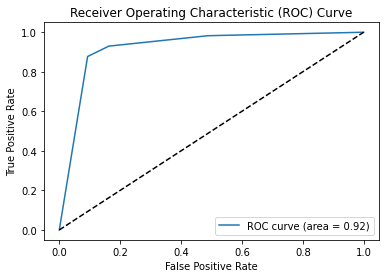

In [ ]:
# Plot ROC curve and calculate AUC score
y_pred_proba = knn.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
auc_score = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy: ", accuracy)
print("Specificity: ", specificity)
print("Recall: ", recall)
print("Precision: ", precision)
print("F1-score: ", f1_score)
print("Classification Report:\n", report)
print("AUC score: ", auc_score)
print("True positive: ",tp)
print("True negative: ", tn)

Confusion Matrix:
 [[36  7]
 [ 4 53]]
Accuracy:  0.89
Specificity:  0.8372093023255814
Recall:  0.9298245614035088
Precision:  0.8833333333333333
F1-score:  0.905982905982906
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87        43
           1       0.88      0.93      0.91        57

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.89       100
weighted avg       0.89      0.89      0.89       100

AUC score:  0.9222766217870256
True positive:  53
True negative:  36


In [ ]:
#h
# k= 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)
print(y_pred)
print(y_test)

[0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1
 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 0 0
 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1]
[0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1
 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0
 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1]


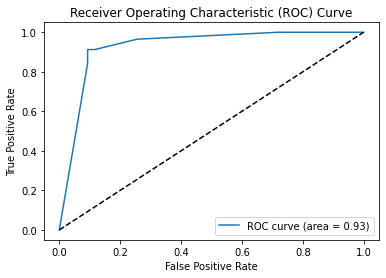

Confusion Matrix:
 [[36  7]
 [ 4 53]]
Accuracy:  0.89
Specificity:  0.8372093023255814
Recall:  0.9298245614035088
Precision:  0.8833333333333333
F1-score:  0.905982905982906
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87        43
           1       0.88      0.93      0.91        57

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.89       100
weighted avg       0.89      0.89      0.89       100

AUC score:  0.9273765809873521
True positive:  53
True negative:  36


In [ ]:
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
recall = tp / (tp + fn)
precision = tp / (tp + fp)
f1_score = 2 * precision * recall / (precision + recall)

y_pred_proba = knn.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
auc_score = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("Confusion Matrix:\n", conf_matrix)
print("Accuracy: ", accuracy)
print("Specificity: ", specificity)
print("Recall: ", recall)
print("Precision: ", precision)
print("F1-score: ", f1_score)
print("Classification Report:\n", report)
print("AUC score: ", auc_score)
print("True positive: ",tp)
print("True negative: ", tn)

In [ ]:
# k= 7
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)
print(y_pred)
print(y_test)

[0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1
 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 0 0
 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1]
[0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1
 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0
 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1]


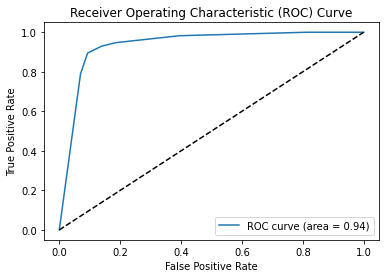

Confusion Matrix:
 [[36  7]
 [ 4 53]]
Accuracy:  0.89
Specificity:  0.8372093023255814
Recall:  0.9298245614035088
Precision:  0.8833333333333333
F1-score:  0.905982905982906
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87        43
           1       0.88      0.93      0.91        57

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.89       100
weighted avg       0.89      0.89      0.89       100

AUC score:  0.9361485108119135
True positive:  53
True negative:  36


In [ ]:
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
recall = tp / (tp + fn)
precision = tp / (tp + fp)
f1_score = 2 * precision * recall / (precision + recall)

y_pred_proba = knn.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
auc_score = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("Confusion Matrix:\n", conf_matrix)
print("Accuracy: ", accuracy)
print("Specificity: ", specificity)
print("Recall: ", recall)
print("Precision: ", precision)
print("F1-score: ", f1_score)
print("Classification Report:\n", report)
print("AUC score: ", auc_score)
print("True positive: ",tp)
print("True negative: ", tn)

In [ ]:
# k= 9
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)
print(y_pred)
print(y_test)

[0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1
 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 0 0
 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1]
[0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1
 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0
 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1]


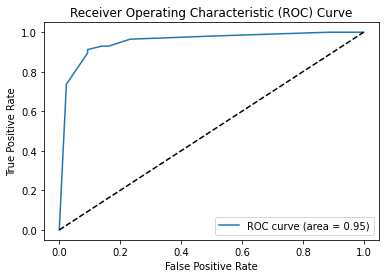

Confusion Matrix:
 [[36  7]
 [ 4 53]]
Accuracy:  0.89
Specificity:  0.8372093023255814
Recall:  0.9298245614035088
Precision:  0.8833333333333333
F1-score:  0.905982905982906
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87        43
           1       0.88      0.93      0.91        57

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.89       100
weighted avg       0.89      0.89      0.89       100

AUC score:  0.952468380252958
True positive:  53
True negative:  36


In [ ]:
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
recall = tp / (tp + fn)
precision = tp / (tp + fp)
f1_score = 2 * precision * recall / (precision + recall)

y_pred_proba = knn.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
auc_score = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("Confusion Matrix:\n", conf_matrix)
print("Accuracy: ", accuracy)
print("Specificity: ", specificity)
print("Recall: ", recall)
print("Precision: ", precision)
print("F1-score: ", f1_score)
print("Classification Report:\n", report)
print("AUC score: ", auc_score)
print("True positive: ",tp)
print("True negative: ", tn)

In [ ]:
# k= 11
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)
print(y_pred)
print(y_test)

[0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1
 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 0 0
 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1]
[0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1
 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0
 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1]


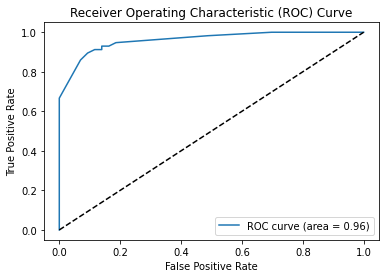

Confusion Matrix:
 [[36  7]
 [ 4 53]]
Accuracy:  0.89
Specificity:  0.8372093023255814
Recall:  0.9298245614035088
Precision:  0.8833333333333333
F1-score:  0.905982905982906
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87        43
           1       0.88      0.93      0.91        57

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.89       100
weighted avg       0.89      0.89      0.89       100

AUC score:  0.9608323133414932
True positive:  53
True negative:  36


In [ ]:
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
recall = tp / (tp + fn)
precision = tp / (tp + fp)
f1_score = 2 * precision * recall / (precision + recall)

y_pred_proba = knn.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
auc_score = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("Confusion Matrix:\n", conf_matrix)
print("Accuracy: ", accuracy)
print("Specificity: ", specificity)
print("Recall: ", recall)
print("Precision: ", precision)
print("F1-score: ", f1_score)
print("Classification Report:\n", report)
print("AUC score: ", auc_score)
print("True positive: ",tp)
print("True negative: ", tn)

In [ ]:
#g
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-68-ab2ed02912d1>:7: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(X)
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change

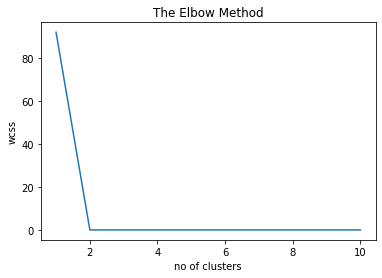

In [ ]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

i. Analyse for which K value, the classification algorithm provides better performance.

ans: Inferring the graph we could conclude that k=5 provides better performance